## Análisis grafo Pippo, Tipo Producto

In [1]:
import networkx as nx
import collections
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast

In [2]:
tuplas = open('puntos.txt', 'r')
puntos = list(eval(tuplas.read()))
tuplas.close()

In [3]:
kwargs = {'width':0.2, 'node_size':5, 'with_labels':False}

In [4]:
co_aps = nx.Graph()
co_aps.add_edges_from(puntos[49])

In [5]:
nx.info(co_aps)

'Name: \nType: Graph\nNumber of nodes: 198\nNumber of edges: 269\nAverage degree:   2.7172'

C:\Users\hmarq\Anaconda3\envs\Pippo\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


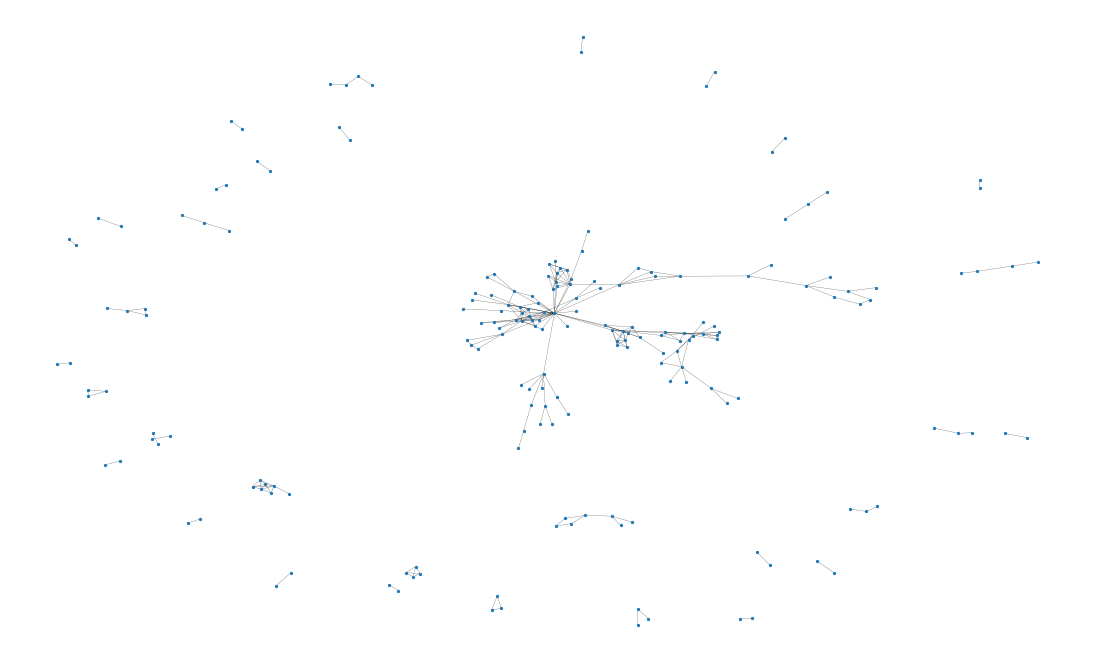

In [6]:
plt.figure(figsize=(15,9))
nx.draw(co_aps, **kwargs)

Evidentemente, hay un componente conectado con el medio y después muchos pequeños. Este y uno chiquito al costado parecen ser los más interesantes para trabajar

In [7]:
connected_components = list(nx.connected_component_subgraphs(co_aps))

In [8]:
len(connected_components)

36

In [9]:
cant_nodos = [len(g.nodes) for g in connected_components]
indices = [cant_nodos.index(n) for n in cant_nodos if n > 10]

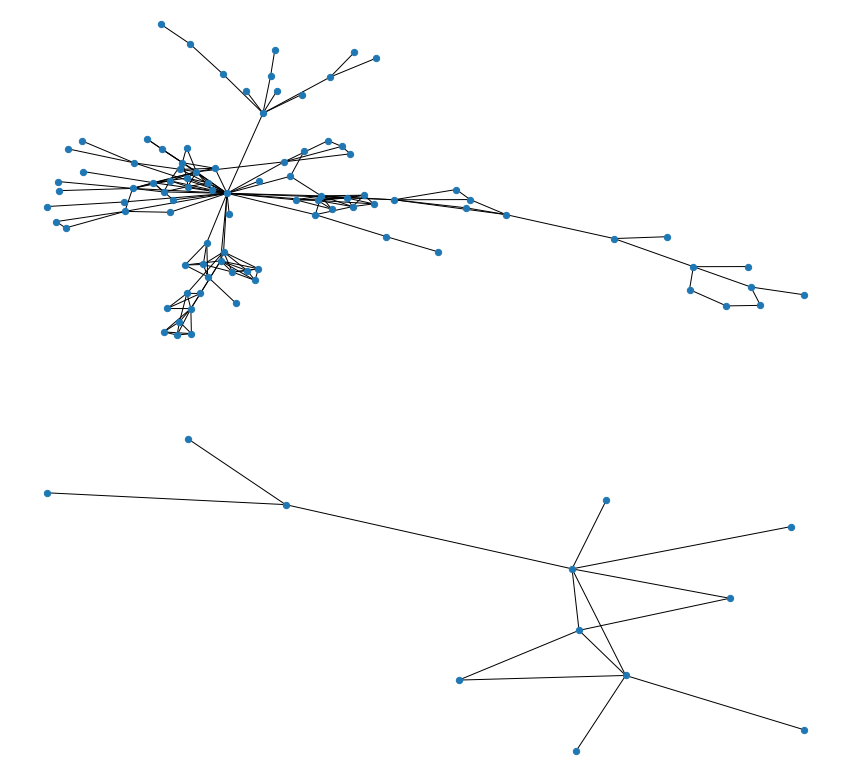

In [10]:
plt.figure(figsize=(15,14))
for n in range(len(indices)):
    plt.subplot(2,1,n+1)
    nx.draw(connected_components[indices[n]], node_size=40)
    

In [11]:
aristas_x_nodo = list(co_aps.degree)
aristas = [aristas_x_nodo[n][1] for n in range(len(aristas_x_nodo))]

edges_x_node = pd.DataFrame( data = np.array( [list(co_aps.nodes), aristas] ).transpose().astype(int), 
                            columns=['Nodo', 'Aristas'])

In [12]:
edges_x_node.sort_values(by='Aristas', ascending=False).head(10)

,Nodo,Aristas
1,447,30
3,615,14
15,1482,10
4,842,9
16,2362,9
108,2218,8
5,463,8
7,1488,8
8,1101,8
6,1100,7


In [13]:
#voy a laburar con el componente mas grande
indice = cant_nodos.index(max(cant_nodos))
componente_principal = connected_components[indice]

In [14]:
def degree_numeric_metrics(grafo):
    print('El mayor grado entre los nodos es de: {}'.format(max(grado[1] for grado in list(grafo.degree))))
    print('El menor grado entre los nodos es de: {}'.format(min(grado[1] for grado in list(grafo.degree))))
    print('La media de los grados de los nodos es de: {}'.format(round(np.mean([grado[1] for grado in list(grafo.degree)]), 3)))

El mayor grado entre los nodos es de: 30
El menor grado entre los nodos es de: 1
La media de los grados de los nodos es de: 2.717


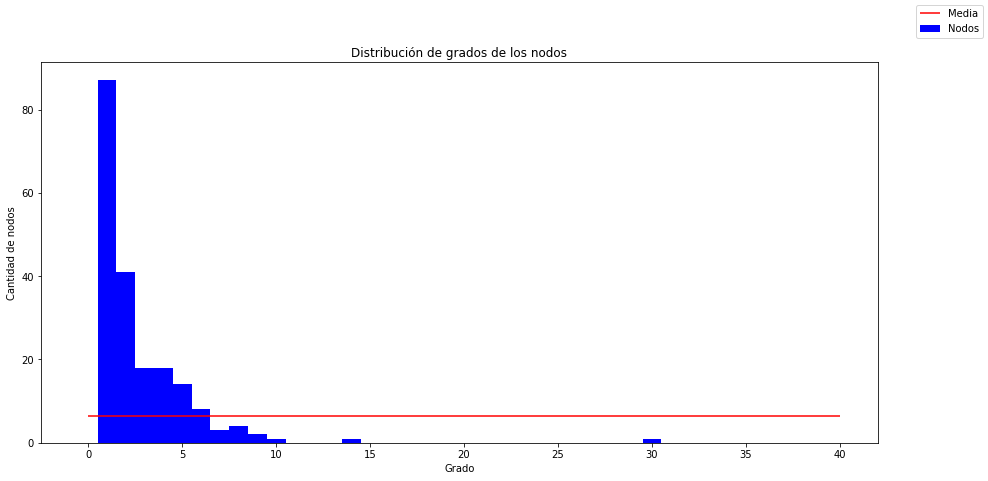

In [15]:
def degree_metrics(grafo):

    degree_numeric_metrics(grafo)
    
    dist_grados = nx.degree_histogram(grafo)
    ind = np.arange(len(dist_grados))

    fig, ax = plt.subplots(figsize=(15,7))
    plt.bar(ind, dist_grados, width=1, color='b', label='Nodos')
    ax.hlines(np.mean(dist_grados), 0, 40, 'r', label='Media')
    plt.title("Distribución de grados de los nodos")
    plt.ylabel("Cantidad de nodos")
    plt.xlabel("Grado")
    fig.legend()
    
degree_metrics(co_aps)

El mayor grado entre los nodos es de: 30
El menor grado entre los nodos es de: 1
La media de los grados de los nodos es de: 3.892


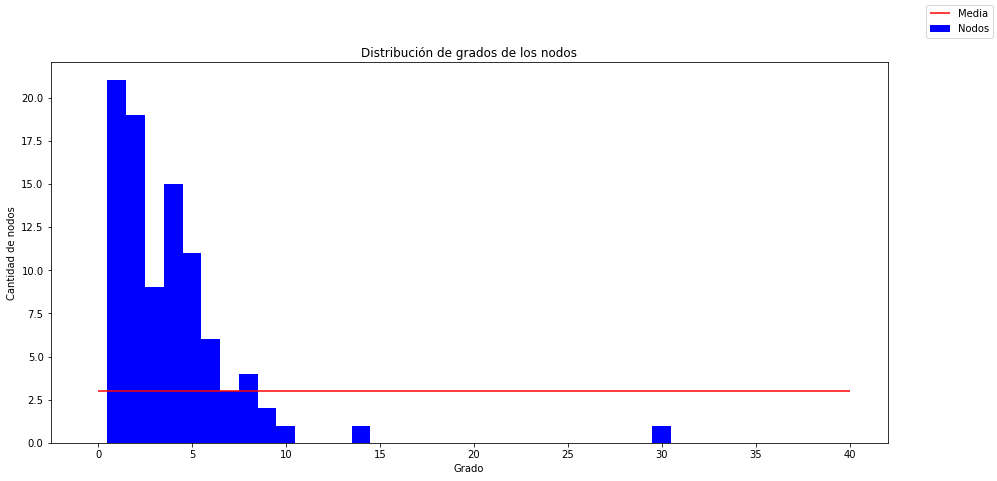

In [16]:
degree_metrics(componente_principal)

## Excentricidad<br>
La excentricidad de un nodo v de un grafo G es la distancia máxima desde v hacia todos los otros nodos en G

In [17]:
excent = [nx.eccentricity(g) for g in connected_components]

## Diametro

El diametro es el maximo de la excentricidad

## Radio

El minimo de la excentricidad

In [18]:
def metricas_distancias(connected_components):
    shortest_paths = [nx.average_shortest_path_length(g) for g in connected_components]
    diametros = [nx.diameter(g) for g in connected_components]
    radios = [nx.radius(g) for g in connected_components]
    return pd.DataFrame(data={'Caminos mas cortos': shortest_paths, 
                                  'Diametros': diametros, 'Radios': radios})

In [19]:
df_datos = metricas_distancias([componente_principal])

In [20]:
df_datos

,Caminos mas cortos,Diametros,Radios
0,3.863721,10,5


Veamos las métricas para los componentes conectados del grafo que nos interesó observar.

In [21]:
#df_datos.iloc[indices]

Los resultados de los demás componentes son bastante esperables, pero también podemos mirarlos.

In [22]:
df_datos

,Caminos mas cortos,Diametros,Radios
0,3.863721,10,5


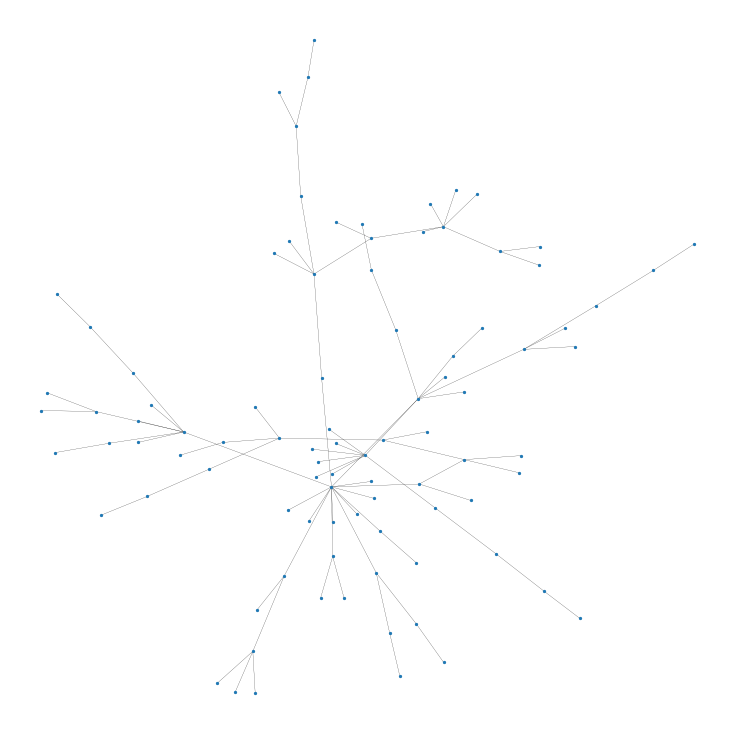

In [23]:
plt.figure(figsize=(10,10))
nx.draw(nx.minimum_spanning_tree(componente_principal), **kwargs)

In [24]:
page_rank = nx.pagerank(componente_principal)
df_pr = pd.DataFrame({'Nodos':list(page_rank.keys()), 'Ranking':list(page_rank.values())})
len(df_pr.sort_values(by='Ranking', ascending=False).head(10))

10

In [25]:
df_pr.sort_values(by='Ranking', ascending=False)['Nodos'].iloc[0]

447

In [26]:
#df_tot_ana = pd.read_csv('E:\yo\digital house\desafíos\desafio_3\hector\datos_hector\Pippo_tot_ana.csv')
df_tot_ana = pd.read_csv('Pippo_tot_ana.csv')

In [27]:
for n in range(len(df_pr.sort_values(by='Ranking', ascending=False).head(10))):
    mask = df_tot_ana['ProductId'] == df_pr.sort_values(by='Ranking', ascending=False)['Nodos'].iloc[n]
    print(df_tot_ana[mask]['ProductType'].unique())

['Toallas y Toallones']
['Almohadones']
['Mantelería']
['Sábanas']
['Mantelería']
['Toallas y Toallones']
['Toallas y Toallones']
['Sábanas']
['Sábanas']
['Sábanas']
